In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
df = pd.read_excel(r'C:\Users\ACER\Downloads\superstore_sales.xlsx')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


----------Get the number of rows and columns

In [3]:
df.shape

(51290, 21)

----------Count the number of missing values

In [4]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

isnull() → gives True for null cells

sum() → adds up those True values (i.e., counts the nulls)

.sum() is used to add up values — and when applied to a DataFrame of True/False values:

True = 1

False = 0

[False, True, True, False]

0 + 1 + 1 + 0 = 2

sum = 2

So, .sum() will return 2, because there are 2 True values (which represent NaNs when using isnull()).





----------Which are the most selling products?

In [10]:
boughts=df.groupby('product_name').agg({'quantity':'sum'}).sort_values('quantity',ascending=False)[:10]
boughts

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


df.groupby('product_name')
Groups the data by product name.

.agg({'quantity': 'sum'})
Sums the total quantity sold for each product.

.sort_values('quantity', ascending=False)
Sorts the products in descending order of total quantity sold (most sold at top).

[:10]
Selects the top 10 most sold products.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Staples'),
  Text(1, 0, 'Cardinal Index Tab, Clear'),
  Text(2, 0, 'Eldon File Cart, Single Width'),
  Text(3, 0, 'Rogers File Cart, Single Width'),
  Text(4, 0, 'Sanford Pencil Sharpener, Water Color'),
  Text(5, 0, 'Stockwell Paper Clips, Assorted Sizes'),
  Text(6, 0, 'Avery Index Tab, Clear'),
  Text(7, 0, 'Ibico Index Tab, Clear'),
  Text(8, 0, 'Smead File Cart, Single Width'),
  Text(9, 0, 'Stanley Pencil Sharpener, Water Color')])

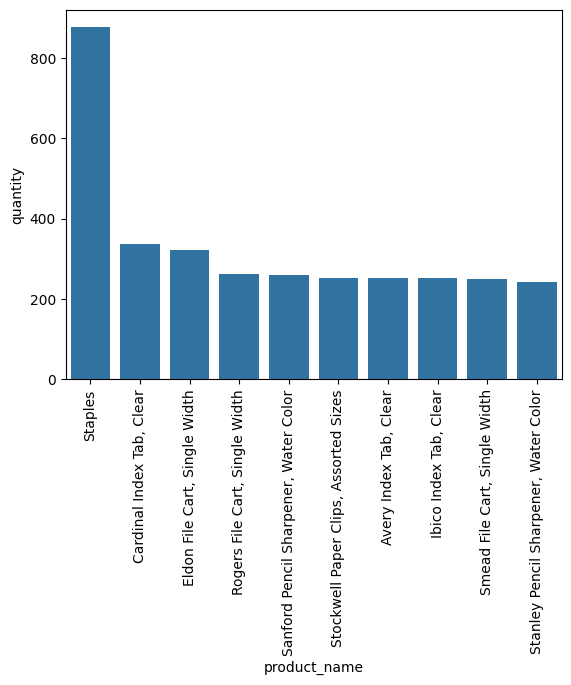

In [11]:
sns.barplot(x='product_name',y='quantity',data=boughts.reset_index())
plt.xticks(rotation='vertical')

sns.barplot(x='product_name', y='quantity', data=boughts.reset_index())
sns.barplot() → This creates a vertical bar chart using Seaborn.

x='product_name' → X-axis will show product names (categories).

y='quantity' → Y-axis will show total quantities (numerical values).

data=boughts.reset_index() →

boughts is a DataFrame where product_name is currently the index.

reset_index() turns the index into a normal column so that sns.barplot() can access 'product_name'.

2. plt.xticks(rotation='vertical')
plt.xticks() → Controls how x-axis tick labels are displayed.

rotation='vertical' → Rotates the product names to be vertical so they don’t overlap (useful when names are long or there are many).

🖼️ Result:
A bar chart where:

X-axis = Top 10 product names

Y-axis = Quantity sold

Labels are vertical for readability

----------Which are the Top 10 products by sales?

In [5]:
productSales = df.groupby('product_name')['sales'].sum().reset_index()
productSales.sort_values(by='sales', inplace=True, ascending=False)
productSales.head(10)


,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


df.groupby('product_name')
➤ Groups the entire DataFrame df by unique values in the product_name column.

['sales']
➤ Selects only the sales column for aggregation (ignores others like date, etc.).

.sum()
➤ Sums the sales for each product name group.

.reset_index()
➤ Converts the result from a GroupBy object (which uses product_name as an index) back into a regular DataFrame with a default integer index.

🧠 Result:
You now have a new DataFrame (productSales) with:

One row per product

Total sales for each product

.head(10)
➤ Displays the top 10 rows of the productSales DataFrame.


sort_values(by='sales')
➤ Sorts the DataFrame based on the sales column.

ascending=False
➤ Sorts in descending order (highest sales first).

inplace=True
➤ Modifies productSales directly instead of returning a new DataFrame.

🧠 Result:
productSales is now sorted from most-sold product to least-sold.


"Group by product"

"Sum all numeric columns"

"Then select only the profit column


------------Which are the most profitable products?

In [7]:
profitable_products = df.groupby('product_name')['profit'].sum().reset_index()
profitable_products.sort_values(by='profit', inplace=True, ascending=False)
profitable_products.head(10)


,product_name,profit
866,Canon imageCLASS 2200 Advanced Copier,25199.9280
970,"Cisco Smart Phone, Full Size",17238.5206
2415,"Motorola Smart Phone, Full Size",17027.1130
1926,"Hoover Stove, Red",11807.9690
3098,"Sauder Classic Bookcase, Traditional",10672.0730
1714,"Harbour Creations Executive Leather Armchair, ...",10427.3260
2501,"Nokia Smart Phone, Full Size",9938.1955
971,"Cisco Smart Phone, with Caller ID",9786.6408
2502,"Nokia Smart Phone, with Caller ID",9465.3257
589,"Belkin Router, USB",8955.0180


group by product names and sum all columns and..select only profit columns of each product names that you have grouped before

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Cisco Smart Phone, Full Size'),
  Text(2, 0, 'Motorola Smart Phone, Full Size'),
  Text(3, 0, 'Hoover Stove, Red'),
  Text(4, 0, 'Sauder Classic Bookcase, Traditional'),
  Text(5, 0, 'Harbour Creations Executive Leather Armchair, Adjustable'),
  Text(6, 0, 'Nokia Smart Phone, Full Size'),
  Text(7, 0, 'Cisco Smart Phone, with Caller ID'),
  Text(8, 0, 'Nokia Smart Phone, with Caller ID'),
  Text(9, 0, 'Belkin Router, USB')])

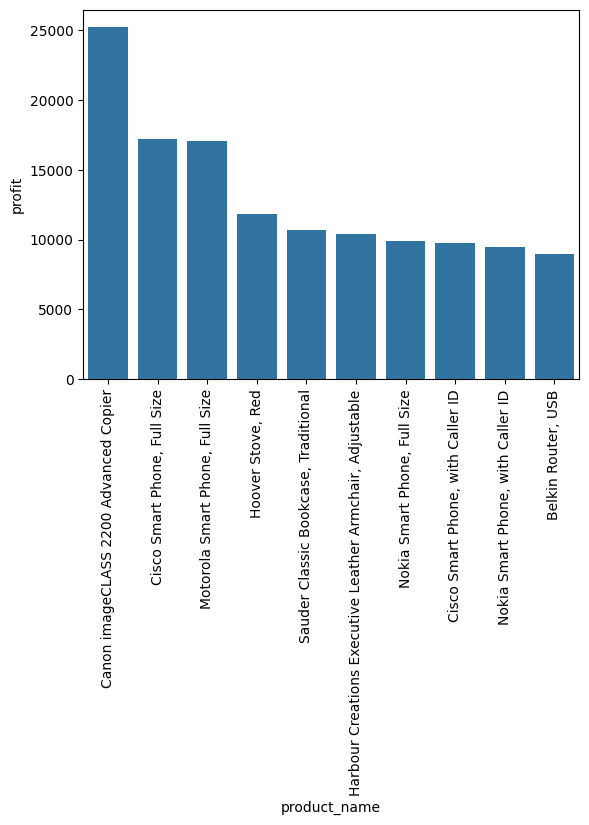

In [8]:
sns.barplot(x='product_name',y='profit',data=profitable_products.head(10).reset_index())
plt.xticks(rotation='vertical')

xticks → refers to the labels on the X-axis (i.e., product names).

rotation='vertical' → rotates the text 90 degrees vertically, so each product name is easier to read when there are many or they’re long.


sns.barplot(...)

x='product_name': Sets the product names on the X-axis.

y='profit': Sets the profit values on the Y-axis.

data=profitable_products.head(10).reset_index():

Selects the top 10 most profitable products.

.reset_index() is used to avoid any issues if the DataFrame index is not sequential (especially after sorting).



---------------What category sold the most?

In [6]:
df.groupby(['category', 'sales']).sum(numeric_only=True).reset_index()


,category,sales,quantity,discount,profit,shipping_cost,year
0,Furniture,1.892,1,0.6,-0.9933,0.18000,2014
1,Furniture,1.988,1,0.6,-1.4413,0.17000,2014
2,Furniture,2.032,1,0.6,-1.3208,0.10000,2014
3,Furniture,2.328,4,1.2,-1.5132,0.38000,4026
4,Furniture,2.784,2,0.2,0.4176,0.14000,2014
...,...,...,...,...,...,...,...
29126,Technology,10499.970,3,0.0,5039.9856,363.19000,2014
29127,Technology,11199.968,4,0.2,3919.9888,45.98000,2014
29128,Technology,13999.960,4,0.0,6719.9808,20.00054,2014
29129,Technology,17499.950,5,0.0,8399.9760,349.07000,2013


1. df.groupby(['category', 'sales'])
This groups the rows of the DataFrame based on unique combinations of values in category and sales.

For example, if your data looks like this:

category	sales	quantity	profit
A	100	2	10
A	100	3	15
B	200	1	5

After groupby(['category', 'sales']), it will group the first two rows (same category and sales), and the last row will be in its own group.

2. .sum(numeric_only=True)
This tells pandas to sum only the numeric columns (like quantity, profit, etc.) within each group.

Any non-numeric columns (like strings or datetime) are ignored to avoid errors.

Example result from above:

category	sales	quantity	profit
A	100	5	25
B	200	1	5

This avoids the error you saw earlier, caused by trying to sum datetime columns.

3. .reset_index()
After grouping, pandas creates a hierarchical index using category and sales.

reset_index() flattens this structure back into regular columns, giving you a clean DataFrame.

 -----------Which are the most profitable category?

In [11]:
profitable_category = df.groupby('category').sum(numeric_only=True)[['profit']].reset_index()
profitable_category.sort_values(by='profit', ascending=False, inplace=True)
profitable_category

,category,profit
2,Technology,663778.73318
1,Office Supplies,518473.83430
0,Furniture,286782.25380


df.groupby('category')

Groups the DataFrame df by the values in the 'category' column.

Example: If 'category' has values like "Furniture", "Technology", it creates separate groups for each.

.sum(numeric_only=True)

Sums all numeric columns (like sales, quantity, profit, etc.) within each category group.

Avoids errors with non-numeric or datetime columns.

[['profit']]

After summing, selects only the 'profit' column for further analysis.

.reset_index()

Resets the index so 'category' becomes a normal column again instead of an index.

This results in a clean DataFrame with two columns: 'category' and 'profit'.


profitable_category.sort_values(by='profit', ascending=False, inplace=True)
🔍 What it does:
sort_values(by='profit', ascending=False)

Sorts the DataFrame in descending order of profit so the most profitable category appears first.

inplace=True

Applies the sort directly to profitable_category without needing to assign it again.

🔹 Final Output (profitable_category)

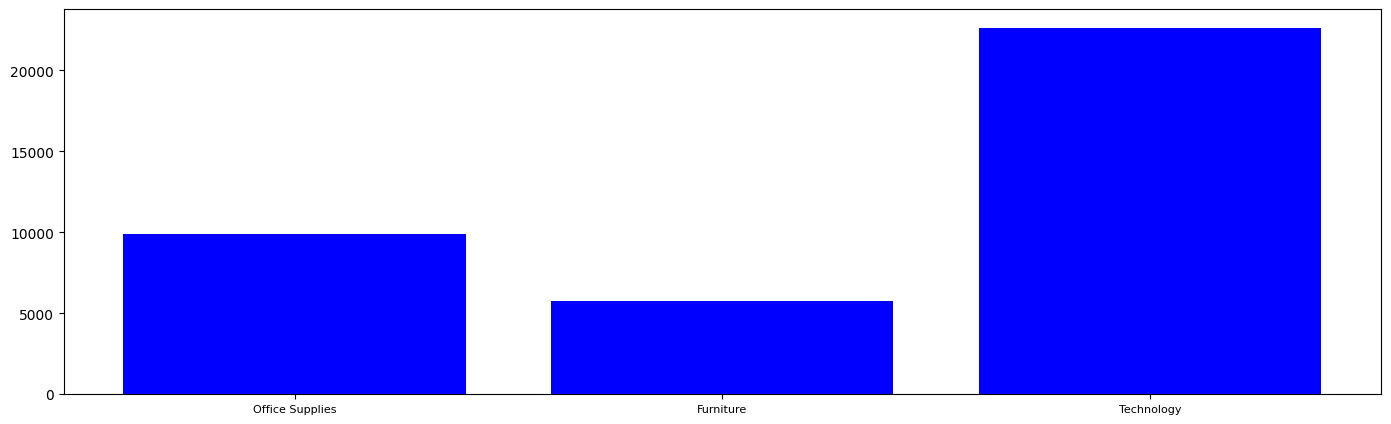

In [5]:
plt.figure(figsize=(17,5))
plt.bar(df['category'],df['sales'],color='b')
plt.xticks(size=8)
plt.show()

plt.figure(figsize=(17,5))
Purpose: Creates a new figure (canvas) for plotting.

figsize=(17, 5): Sets the width to 17 inches and the height to 5 inches — this defines the dimensions of the plot.

🔹 plt.bar(df['category'], df['sales'], color='b')
Purpose: Creates a vertical bar chart.

df['category']: Categories on the x-axis (e.g., product types, departments).

df['sales']: Sales values on the y-axis (height of each bar).

color='b': Bars will be blue ('b' is the shorthand for blue in matplotlib).

🔹 plt.xticks(size=8)
Purpose: Adjusts the font size of the x-axis tick labels.

size=8: Makes the x-axis labels smaller for better readability if many categories are present.

🔹 plt.show()
Purpose: Displays the final plot.



---------------Total sales values by category and subcategory

In [6]:
df.groupby(['category', 'sub_category']).sum(numeric_only=True)


sales  quantity  discount        profit  \
category        sub_category                                                   
Furniture       Bookcases     1.466572e+06      8310   370.710  161924.41950   
                Chairs        1.501682e+06     12336   560.120  141973.79750   
                Furnishings   3.855783e+05     11225   478.880   46967.42550   
                Tables        7.570419e+05      3083   250.320  -64083.38870   
Office Supplies Appliances    1.011064e+06      6078   248.700  141680.58940   
                Art           3.720920e+05     16301   573.080   57953.91090   
                Binders       4.619115e+05     21429  1102.480   72449.84600   
                Envelopes     1.709043e+05      8380   320.810   29601.11630   
                Fasteners     8.324232e+04      8390   340.240   11525.42410   
                Labels        7.340403e+04      9322   313.890   15010.51200   
                Paper         2.442917e+05     12822   387.300   59207.68270   
                Storage       1.127086e+06     16917   700.490  108461.48980   
                Supplies      2.430742e+05      8543   310.200   22583.26310   
Technology      Accessories   7.492370e+05     10946   370.480  129626.30620   
                Copiers       1.509436e+06      7454   260.418  258567.54818   
                Machines      7.790601e+05      4906   252.000   58867.87300   
                Phones        1.706824e+06     11870   489.610  216717.00580   

                              shipping_cost      year  
category        sub_category                           
Furniture       Bookcases       155481.9670   4852847  
                Chairs          164229.3520   6911889  
                Furnishings      40746.7660   6380451  
                Tables           79861.3940   1732979  
Office Supplies Appliances      108300.5860   3532371  
                Art              41287.1420   9828413  
                Binders          48181.7120  12382700  
                Envelopes        18547.4880   4901146  
                Fasteners         9053.3380   4870955  
                Labels            8059.6750   5245285  
                Paper            26660.8450   7121179  
                Storage         120546.0320  10182612  
                Supplies         24811.5270   4881018  
Technology      Accessories      83513.3340   6189269  
                Copiers         159496.2049   4474471  
                Machines         79135.8485   2990958  
                Phones          184902.4920   6756800

df.groupby(['category', 'sub_category'])
Groups the DataFrame df by two columns: category and sub_category.

Each unique pair of (category, sub_category) becomes a group.

Example:

bash
Copy code
('Furniture', 'Chairs')
('Technology', 'Phones')
🔹 .sum(numeric_only=True)
Aggregates (sums up) only the numeric columns for each group.

Skips non-numeric columns like:

datetime64 (e.g., order_date)

object (e.g., customer_name)

--------------Which are the most selling products in subcategory?

In [7]:
df.groupby(['category','sub_category'],as_index=False)['quantity'].count()

,category,sub_category,quantity
0,Furniture,Bookcases,2411
1,Furniture,Chairs,3434
2,Furniture,Furnishings,3170
3,Furniture,Tables,861
4,Office Supplies,Appliances,1755
5,Office Supplies,Art,4883
6,Office Supplies,Binders,6152
7,Office Supplies,Envelopes,2435
8,Office Supplies,Fasteners,2420
9,Office Supplies,Labels,2606


df.groupby(['category', 'sub_category'], as_index=False)
Groups the DataFrame by category and sub_category.

as_index=False: keeps category and sub_category as regular columns in the result, not as the index.

🔹 ['quantity'].count()
For each group, it counts the number of non-null values in the quantity column.

Basically answers: “How many rows are there in each (category, sub_category) group?”



 1. inplace=True vs inplace=False
✅ What it controls:
Whether the original object is modified or a new object is returned.

Option	What It Does
inplace=True	Updates the original object in memory
inplace=False (default)	Returns a new object, original stays unchanged

🔍 Example:
python
Copy code
df.sort_values('profit', inplace=True)
Changes df directly (no need to assign again).

Same as:

python
Copy code
df = df.sort_values('profit')  # inplace=False
This returns a new sorted DataFrame, and you must assign it back to df.

🔹 2. as_index=True vs as_index=False in groupby()
✅ What it controls:
Whether grouping columns become the index of the result.

Option	What You Get
as_index=True (default)	Grouping columns become index
as_index=False	Grouping columns stay as normal columns

🔍 Example:
python
Copy code
df.groupby('segment').sum()
segment becomes the index of the resulting DataFrame.

python
Copy code
df.groupby('segment', as_index=False).sum()
segment stays as a column, making it easier to sort, filter, or reset.

🧠 Summary:
Parameter	Purpose	Common Use Case
inplace	Modify data directly or return a copy	Use inplace=True to avoid reassigning
as_index	Decide if groupby keys become index	Use as_index=False for cleaner DataFrames

---------------Which customer segments are the most profitable ?

In [9]:
profitable_segment = df.groupby('segment', as_index=False)['profit'].sum()
profitable_segment.sort_values(by='profit', inplace=True, ascending=False)
profitable_segment

,segment,profit
0,Consumer,749239.78206
1,Corporate,442785.85866
2,Home Office,277009.18056


([0, 1, 2],
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

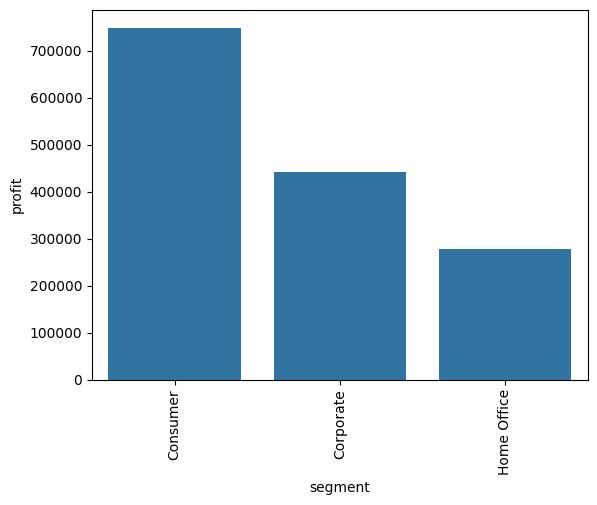

In [11]:
sns.barplot(x='segment',y='profit',data=profitable_segment.reset_index())
plt.xticks(rotation='vertical')

--------------- What shipping modes sold the most products?

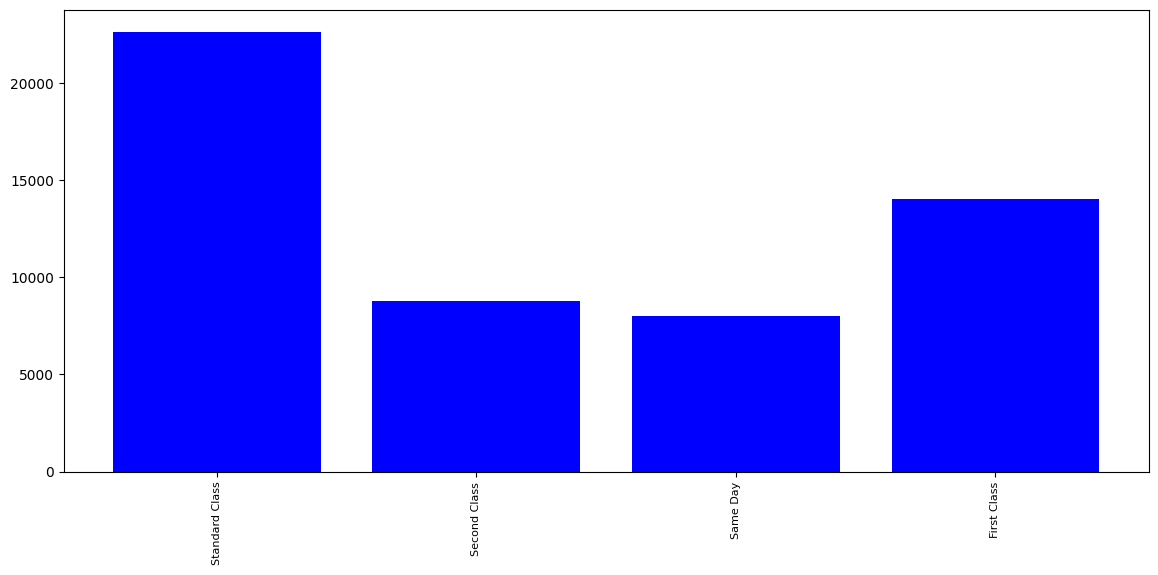

In [5]:
plt.figure(figsize=(14,6))
plt.bar(df['ship_mode'],df['sales'],color='b')
plt.xticks(rotation='vertical',size=8)
plt.show()

plt.figure(figsize=(14, 6))
Creates a new figure for the plot.

figsize=(14, 6) sets the width to 14 inches and height to 6 inches.

🔹 plt.bar(df['ship_mode'], df['sales'], color='b')
Creates a bar chart.

df['ship_mode']: Categories (x-axis).

df['sales']: Heights of bars (y-axis).

color='b': Bars will be blue ('b' stands for blue).

🔹 plt.xticks(rotation='vertical', size=8)
Rotates x-axis labels vertically for better readability.

Sets font size of labels to 8.

🔹 plt.show()
Displays the final plot.



---------------Visualize the 'Category' column from the Shipmode column dataset standpoints.

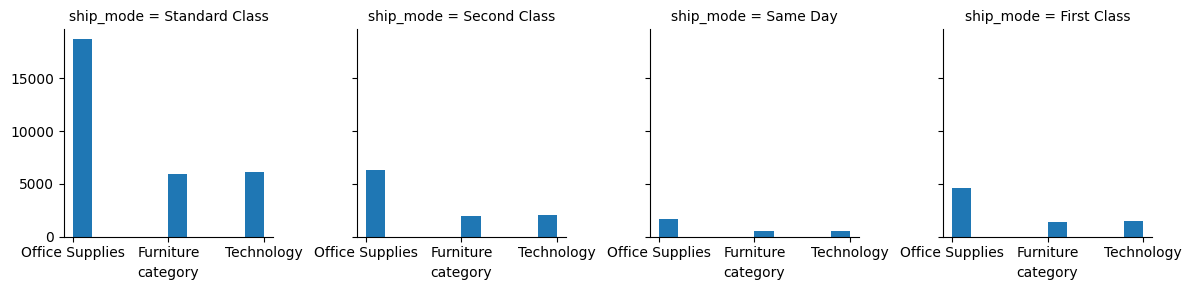

In [6]:
category_hist=sns.FacetGrid(df,col='ship_mode',palette='rainbow')
category_hist.map(plt.hist,'category')

category_hist = sns.FacetGrid(df, col='ship_mode', palette='rainbow')
Creates a FacetGrid using Seaborn (sns), which allows multiple subplots.

df: The DataFrame.

col='ship_mode': Creates one histogram per unique value in the 'ship_mode' column (i.e., one subplot per ship mode).

palette='rainbow': Assigns rainbow colors to the plots (only applies to color-based plots, not plt.hist directly).

🔹 category_hist.map(plt.hist, 'category')
Draws a histogram for the 'category' column in each subplot.

plt.hist: Uses Matplotlib’s histogram function.

Each subplot will show the distribution of categories within that specific ship_mode.

You’ll see separate histograms, one for each shipping mode, showing how often each category (like Furniture, Office Supplies, etc.) appears.    
    



------------What market sold the most products?

C:\Users\ACER\AppData\Local\Temp\ipykernel_1904\1110323151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='market',data=df,palette='rainbow')


<Axes: xlabel='market', ylabel='count'>

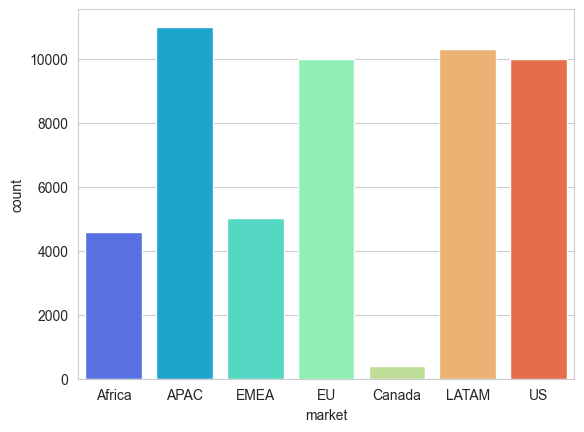

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='market',data=df,palette='rainbow')

sns.set_style('whitegrid')
Sets the background style of the plot to white with gridlines.

Makes it easier to read the chart, especially bar heights.

🔹 sns.countplot(...)
Plots a bar chart of counts for each unique value in the 'market' column.

x='market': Categories on the x-axis (e.g., "US", "EU", etc.).

data=df: Uses your DataFrame.

palette='rainbow': Gives each bar a different color from the rainbow palette.

------------------Which are the Top 10 country by sales?

In [11]:
countries = df.groupby('country').sum(numeric_only=True)[['sales']]
countries.sort_values('sales', inplace=True, ascending=False)
countries.head(10)


,sales
country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
Mexico,6.225906e+05
India,5.896501e+05
United Kingdom,5.285763e+05
Indonesia,4.048875e+05


1. df.groupby('country')
Groups the DataFrame by unique values in the 'country' column.

Example: all rows where country is 'USA' are grouped together.

2. .sum(numeric_only=True)
Performs sum aggregation on numeric columns only (like 'sales', 'profit', 'quantity').

Skips non-numeric columns like dates or strings (avoids errors).

3. [['sales']]
Selects only the 'sales' column from the result to keep in the final DataFrame.

4. countries.sort_values('sales', inplace=True, ascending=False)
Sorts the DataFrame by 'sales' in descending order (highest to lowest).

inplace=True updates the countries DataFrame directly (no need to assign again).

5. countries.head(10)
Displays the top 10 countries with the highest total sales.

---------------Create a pie chart with the 10 countries that have the most sales

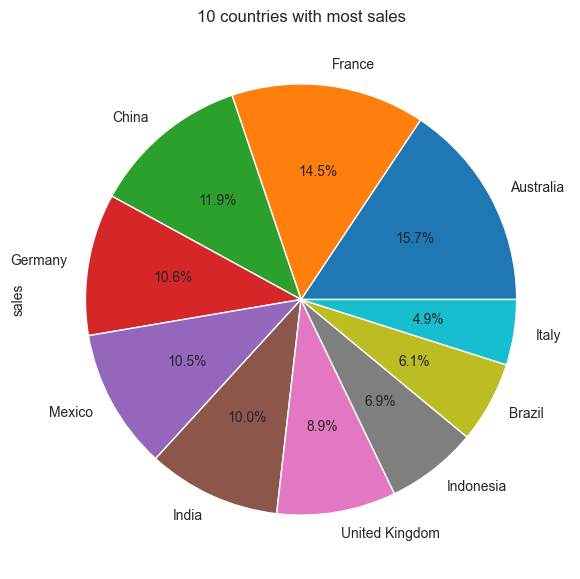

In [12]:
countries=countries.sort_values(by='sales',ascending=False)[1:11]
countries['sales'].plot(kind='pie',autopct='%1.1f%%',figsize=(14,7))
plt.title('10 countries with most sales')
plt.show()

1. countries.sort_values(by='sales', ascending=False)[1:11]
Sorts the countries DataFrame by 'sales' in descending order.

Then slices the DataFrame to select rank 2 to 11 (excluding the top country at index 0).

[1:11] means 2nd to 11th most sales (index-based slicing).

2. countries['sales'].plot(kind='pie', ...)
Plots the 'sales' column as a pie chart.

autopct='%1.1f%%' shows the percentage of total sales (formatted to 1 decimal).

figsize=(14, 7) makes the plot larger and clearer.

3. plt.title(...) & plt.show()
Adds the title: '10 countries with most sales'.

Displays the pie chart.

A pie chart of 10 countries (ranked 2 to 11) showing their percentage contributions to total sales, excluding the top-selling country.

Explanation of autopct='%1.1f%%' in plot(kind='pie'):
autopct controls how the percent values are displayed on the pie chart slices.

📌 Breakdown of '%1.1f%%':
1.1f: Format as a floating-point number with 1 digit before and 1 digit after the decimal point.

%%: Escapes the percent symbol (%), so it appears as a percentage.

🔍 Example:
If a slice represents 23.456% of the total:

With autopct='%1.1f%%', it will display as:
✅ 23.5%

🔄 Other Variants:
'%1.0f%%' → Rounds to nearest whole number (e.g., 24%)

'%1.2f%%' → Shows two decimal places (e.g., 23.46%)

Let me know if you want to customize it further with actual sales values or labels!






You said:
why % symbol before


ChatGPT said:
Great question! Let's break it down:

🧠 Why is % written before in 'autopct='%1.1f%%'?
Actually, the % before the number is not part of the output — it's part of Python’s string formatting syntax using the % operator (an older but still common method).

⚙️ Here's the structure:
'autopct='%1.1f%%' is:

%1.1f → Format number as a float with 1 digit after the decimal.

%% → Escapes the percent sign so it appears as % in the output text.

The first % is part of the Python string format syntax.
The second % (escaped as %%) is the actual percent symbol shown on the chart.



 -------------Which are the average shipping cost for top 10 different countries?

In [13]:
df.groupby('country').agg({'shipping_cost':'mean'}).sort_values('shipping_cost',ascending=False).head(10)

,shipping_cost
country,
Taiwan,155.660714
Chad,148.970000
Lesotho,135.650000
Montenegro,93.937500
Slovenia,61.220000
Republic of the Congo,59.303333
Central African Republic,57.625714
Namibia,50.370000
Bangladesh,46.402883


df.groupby('country')
Groups the DataFrame by each unique country.

.agg({'shipping_cost':'mean'})
For each group (country), it calculates the mean (average) of the shipping_cost.

.sort_values('shipping_cost', ascending=False)
Sorts the resulting countries by their average shipping cost in descending order (highest first).

.head(10)
Returns the top 10 countries with the highest average shipping cost.



-------------Who are the top-10 most profitable customers?

In [15]:
data10=df.sort_values('profit',ascending=False).head(10)[['order_id','customer_name','profit']]
data10

,order_id,customer_name,profit
29530,CA-2013-118689,Tamara Chand,8399.9760
36239,CA-2014-140151,Raymond Buch,6719.9808
48097,CA-2014-166709,Hunter Lopez,5039.9856
33011,CA-2013-117121,Adrian Barton,4946.3700
5522,CA-2011-116904,Sanjit Chand,4630.4755
43831,ES-2014-1651774,Patrick Jones,3979.0800
46525,CA-2014-127180,Tom Ashbrook,3919.9888
10265,CA-2012-145352,Christopher Martinez,3177.4750
548,ID-2011-64599,Carol Adams,2939.3100
24420,IN-2013-50809,Cynthia Arntzen,2817.9900


df.sort_values('profit', ascending=False)
Sorts the entire DataFrame in descending order of profit (highest profit first).

.head(10)
Selects the top 10 rows with the highest profits.

[['order_id', 'customer_name', 'profit']]
Filters only the 3 columns: order_id, customer_name, and profit.

------------------Add a ne column (month)

In [19]:
month=df['order_date'].astype(str)
month=month.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
df['month']=month.map(lambda x:x.month)
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011,1
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011,1
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011,1
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011,1
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014,12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014,12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014,12
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014,12


month = df['order_date'].astype(str)
Takes the order_date column from your DataFrame df.

Converts each entry in order_date to a string format.

The result is a Series of strings representing dates like '2023-05-01'.

python
Copy code
month = month.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
month is a Series of date strings.

.apply() applies a function to each element in the Series.

The function here is a lambda function: lambda x: datetime.strptime(x, '%Y-%m-%d').

What is a lambda function?

A lambda function is a small anonymous function defined with the keyword lambda.

lambda x: means it takes one input x (in this case, each date string).

The body after the colon is the operation applied to x.

In your code:

For each date string x, the lambda converts it to a Python datetime object using datetime.strptime().

datetime.strptime(x, '%Y-%m-%d') reads the string x and parses it according to the format YYYY-MM-DD.

This means '2023-05-01' turns into a datetime object representing May 1, 2023.

python
Copy code
df['month'] = month.map(lambda x: x.month)
month is now a Series of datetime objects.

.map() applies a function to each element (similar to .apply() but often used for mapping values).

The lambda function here is lambda x: x.month.

What happens here?

For each datetime object x, the lambda extracts the .month attribute.

The .month attribute is an integer from 1 to 12 representing the month number.

So May 1, 2023 becomes 5.

The result is assigned to a new column 'month' in your DataFrame df.



Summary of lambdas:
lambda x: datetime.strptime(x, '%Y-%m-%d')
Converts a date string x into a datetime object.

lambda x: x.month
Extracts the month number from a datetime object x.





 What is a lambda function in Python?
A lambda function is a small, anonymous (nameless) function defined using the lambda keyword.

🔹 Syntax:
python
Copy code
lambda arguments: expression
lambda: keyword to define a lambda function.

arguments: like input variables.

expression: the operation or return value.

🔹 Example:
python
Copy code
f = lambda x: x + 10
print(f(5))  # Output: 15
🔸 This is the same as:

python
Copy code
def f(x):
    return x + 10
🔹 Common Use Cases:
Used in short, simple functions.

Often used with functions like:

map()

filter()

sorted()

apply() in pandas.

🔹 Example in apply():
python
Copy code
df['name_length'] = df['name'].apply(lambda x: len(x))
➡ Adds a new column showing the length of each name.

🔹 Limitations:
Only one expression (no multiple statements).

Cannot include loops or multiple lines.

✅ Use lambda when:
You need a quick, one-time-use function.

The logic is simple and can be written in one line.

--------------Total sales values by year and month?

In [21]:
date = df.groupby(['year', 'month']).sum(numeric_only=True)
date

sales  quantity  discount       profit  shipping_cost
year month                                                              
2011 1       98898.48886      1463    68.758   8321.80096    10544.78800
     2       91152.15698      1224    52.252  12417.90698    10681.16300
     3      145729.36736      1836    74.212  15303.56826    13096.18550
     4      116915.76418      2020    80.782  12902.32438    12954.52000
     5      146747.83610      2013    82.382  12183.82870    16443.20600
     6      215207.38022      3112   159.534  23415.24702    23813.10900
     7      115510.41912      1774    80.086   5585.00352    11844.47600
     8      207581.49122      3035   121.462  23713.66772    22001.13600
     9      290214.45534      3707   137.678  35776.88394    29664.85100
     10     199071.26404      2727   110.192  25963.41834    21380.08200
     11     298496.53752      4039   178.836  32709.17772    34701.99800
     12     333925.73460      4493   187.220  40647.98400    37144.83100
2012 1      135780.72024      1845    74.454  10401.63764    13665.74900
     2      100510.21698      1473    62.784  15000.09618    11393.72600
     3      163076.77116      2237   101.682  17992.91756    16170.78500
     4      161052.26952      2250    93.248  17366.96722    16767.86200
     5      208364.89124      2921   114.272  29876.70374    23801.61700
     6      256175.69842      3671   168.284  34407.15362    28155.90000
     7      145236.78512      2321   104.404  15585.38842    17334.43500
     8      303142.94238      3818   136.166  43573.87858    32038.73000
     9      289389.16564      4205   169.070  27776.18034    28023.17800
     10     252939.85020      3563   135.866  30662.88270    25085.74000
     11     323512.41690      5193   215.868  31820.72180    33489.74100
     12     338256.96660      4614   172.676  32950.75130    37563.36100
2013 1      199185.90738      2413    91.442  26810.55968    21677.43200
     2      167239.65040      2102    78.012  25340.02610    16911.85000
     3      198594.03012      2686   114.384  23433.77462    21268.01000
     4      177821.31684      2688   116.116  19462.03844    19133.23400
     5      260498.56470      3808   153.092  28495.69410    28315.21100
     6      396519.61190      5327   213.642  45478.41340    42814.02600
     7      229928.95200      3252   125.644  28863.82720    24501.84236
     8      326488.78936      4934   202.640  31023.66846    35673.08800
     9      376619.24568      5793   240.674  38905.66778    38488.40000
     10     293406.64288      3883   160.860  42433.22258    31174.68400
     11     373989.36010      5556   215.324  48062.99670    41407.16700
     12     405454.37802      5694   223.692  50202.87112    43183.80000
2014 1      241268.55566      3122   127.928  28001.38626    24870.80100
     2      184837.35556      2482   111.126  19751.69996    19525.80000
     3      263100.77262      3722   142.016  37357.26052    26838.63554
     4      242771.86130      3594   164.000  23782.30120    26272.71800
     5      288401.04614      4300   188.986  33953.55774    31882.58300
     6      401814.06310      6009   251.462  43778.60280    41894.07600
     7      258705.68048      3637   163.512  28035.87258    29581.73300
     8      456619.94236      5824   217.672  53542.89496    46759.35300
     9      481157.24370      6837   272.094  67979.45110    53485.43000
     10     422766.62916      5876   233.752  58209.83476    44622.41400
     11     555279.02700      7706   304.384  62856.58790    59918.35500
     12     503143.69348      7513   335.106  46916.52068    54853.89100

1. df.groupby(['year', 'month'])
Groups the DataFrame df by each unique combination of year and month.

For example, orders from 2023, January will be grouped together.

✅ 2. .sum(numeric_only=True)
Within each (year, month) group, it sums only the numeric columns like sales, profit, quantity, etc.

It ignores non-numeric columns (like strings or dates), preventing errors.

✅ 3. date = ...
Stores the grouped and summed result in a new DataFrame called date.

-------------Total sales chart by the year?

([0, 1, 2, 3],
 [Text(0, 0, '2011'),
  Text(1, 0, '2012'),
  Text(2, 0, '2013'),
  Text(3, 0, '2014')])

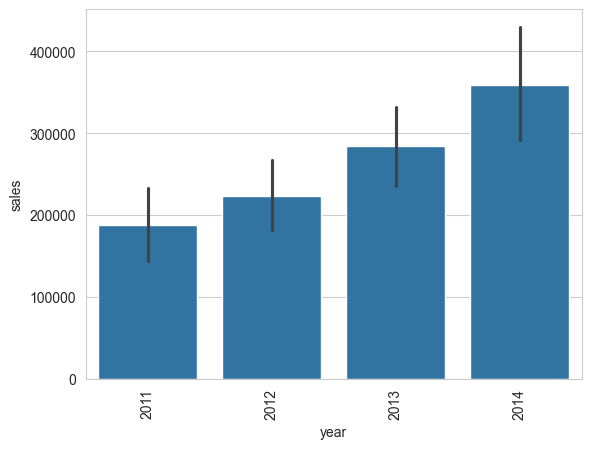

In [24]:
sns.barplot(x='year',y='sales',data=date.reset_index())
plt.xticks(rotation='vertical')

sns.barplot(...)
Uses Seaborn to draw a bar plot.

x='year': X-axis will show the years.

y='sales': Y-axis will show the total sales.

data=date.reset_index(): Uses the date DataFrame (which has year and month as index).
✅ reset_index() converts those index columns back to regular columns so Seaborn can access them.

2. plt.xticks(rotation='vertical')
Rotates the x-axis labels vertically (90°), so year labels don’t overlap and are easier to read.




date = df.groupby(['year', 'month']).sum(numeric_only=True)
This gives you a DataFrame where year and month are index columns, like this:

yaml
Copy code
            sales   profit
year  month                
2022     1      5000     900
2022     2      6200     850
2023     1      7000     1000
Here, year and month are not regular columns—they're the index.

🔧 What does reset_index() do?
It moves the index back to regular columns:

python
Copy code
date.reset_index()
Now it becomes:

yaml
Copy code
   year  month  sales  profit
0  2022      1   5000     900
1  2022      2   6200     850
2  2023      1   7000    1000
Now you can easily use 'year' and 'month' in plots or filters—because they’re normal columns, not index values.

✅ Summary:
.reset_index() = move index columns back into normal columns.

This makes the DataFrame easier to use with plotting tools like Seaborn or Matplotlib.







